<a href="https://colab.research.google.com/github/HimalKarkal/NFL/blob/Plays-Analysis/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, I will use the dataframe of features selected to train a Machine Learning model to classify positiveTackle and also get the probability of each prediction.

# Importing data

In [6]:
import pandas as pd

x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv')
x.head()

,Unnamed: 0,gameId,playId,nflId,frameId,defender_x,defender_y,distance_to_closest_tackler,ball_carrier_momentum,distance_to_ball_carrier,positiveTackle,defender_momentum
0,0,2022090800,56,38577.0,1,78.25,27.53,4.813948,540.8886,11.013632,0,136.4
1,1,2022090800,56,38577.0,2,78.20,27.69,4.361250,541.7568,10.246878,0,195.8
2,2,2022090800,56,38577.0,3,78.16,27.88,3.940114,519.1836,9.464486,0,243.1
3,3,2022090800,56,38577.0,4,78.14,28.13,3.546336,492.2694,8.646531,0,297.0
4,4,2022090800,56,38577.0,5,78.12,28.42,3.275363,471.4326,7.812074,0,335.5


In [7]:
data = x.copy()

In [8]:
# Checking out data
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,gameId,playId,nflId,frameId,defender_x,defender_y,distance_to_closest_tackler,ball_carrier_momentum,distance_to_ball_carrier,positiveTackle,defender_momentum
0,2022090800,56,38577.0,1,78.25,27.53,4.813948,540.8886,11.013632,0,136.4
1,2022090800,56,38577.0,2,78.20,27.69,4.361250,541.7568,10.246878,0,195.8
2,2022090800,56,38577.0,3,78.16,27.88,3.940114,519.1836,9.464486,0,243.1
3,2022090800,56,38577.0,4,78.14,28.13,3.546336,492.2694,8.646531,0,297.0
4,2022090800,56,38577.0,5,78.12,28.42,3.275363,471.4326,7.812074,0,335.5


# Model Building


Training Extra Trees Classifier on the entire data

In [3]:
# Importing necessary packages

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [9]:
# Splitting data

X = data[['defender_x','defender_y','distance_to_ball_carrier', 'distance_to_closest_tackler', 'defender_momentum', 'ball_carrier_momentum']]
y = data['positiveTackle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Training data

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [10]:
# Predict the probability of each classification and test the model

# Predicting probabilities

y_proba = etc.predict_proba(X_test)

# Making predictions

y_pred = etc.predict(X_test)

In [11]:
# Model Evaluation

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall Score:', recall_score(y_test, y_pred, average = 'weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average = 'weighted'))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))


Accuracy Score: 0.9160597529110415
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95   1028469
           1       0.81      0.37      0.51    136578
           2       1.00      0.10      0.18       687

    accuracy                           0.92   1165734
   macro avg       0.91      0.49      0.55   1165734
weighted avg       0.91      0.92      0.90   1165734

Precision Score: 0.9092837847354007
Recall Score: 0.9160597529110415
F1 Score: 0.9017266531238608
Cohen Kappa Score: 0.471093950241286


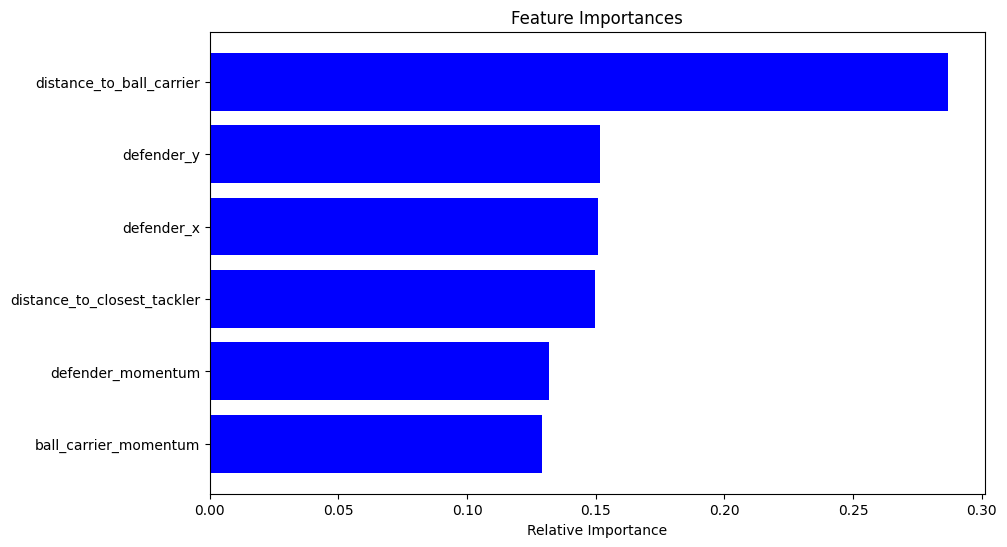

In [15]:
# Graphing feature importances

import numpy as np
import matplotlib.pyplot as plt
importances = etc.feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

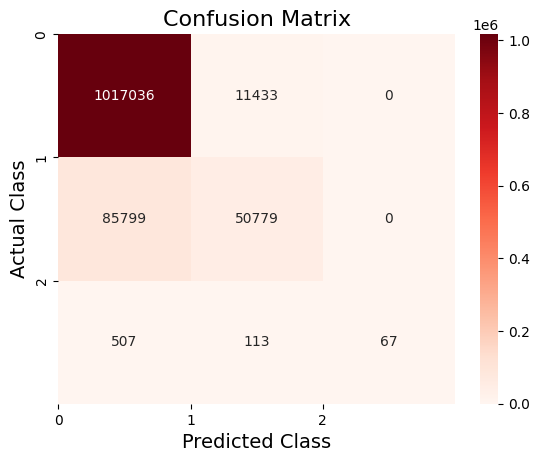

In [16]:
# Graphing the confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")

# Add labels and title
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)

# Set tick labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Show the plot
plt.show()


In [19]:
!pip install joblib

In [20]:
import joblib
joblib.dump(etc, '/content/drive/MyDrive/Colab Notebooks/etc_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/etc_model.pkl']

In [1]:
import joblib
etc = joblib.load('/content/drive/MyDrive/Colab Notebooks/etc_model.pkl')